# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
SEED = 123456
import os
import random as rn
import numpy as np

os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
rn.seed(SEED)

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = rn.gauss(450., 25.)
        return [new_thrust + rn.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 0., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        
        #print(task.sim.time, task.sim.pose)said
        
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

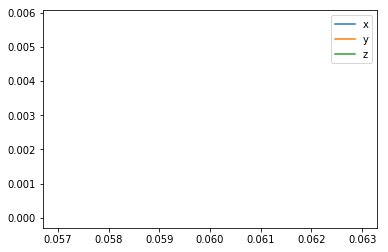

In [3]:
# FOR XSERVER RENDERING
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

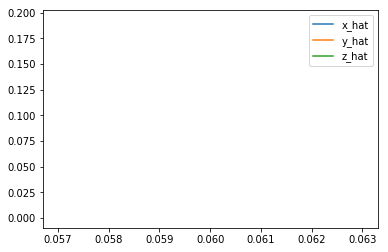

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

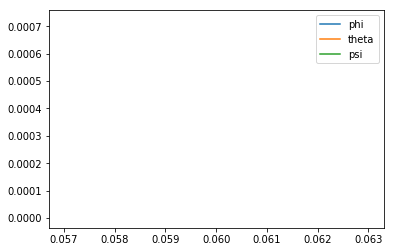

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

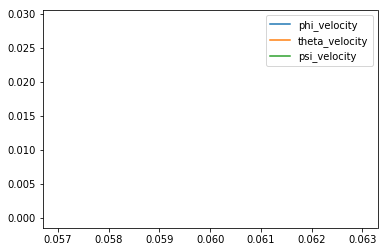

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

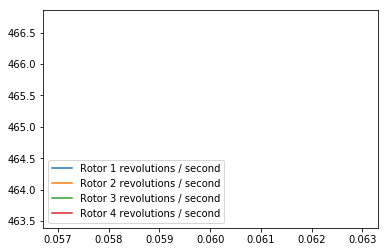

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-1.11660257e-06  5.22565126e-07  5.77820960e-03  3.99394407e-04
  7.22615386e-04  0.00000000e+00]
[-8.71895701e-05  4.34606672e-05  1.92593439e-01]
[0.0174366  0.02908262 0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
# Visual Memory Storage for storing individual positions for later playback
from collections import namedtuple

class VisMem:
    def __init__(self):
        self.memory = []
        self.snapshots = namedtuple("Experience", field_names=["x", "y", "z", "phi", "theta", "psi"])

    def add(self,p):
        """Add a new experience to memory."""
        e = self.snapshots(p[0], p[1], p[2], p[3], p[4], p[5])
        self.memory.append(e)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

In [10]:
# SIMULATION THANKS TO https://github.com/AtsushiSakai/PythonRobotics

import sys

from Quadrotor import Quadrotor
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation, rc

from task import Task
from IPython.display import display, clear_output, HTML, Image

# X PHI = YAW
# Y THETA = ROLL
# Z PSI = PITCH

# Animation function for FuncAnimation
def animate(i, vs):
    res = vs.vmem.memory
    q = vs.qd
    ani = q.update_pose(x=res[i][0], 
    y=res[i][1], 
    z=res[i][2], 
    roll=res[i][4],
    pitch=res[i][5], 
    yaw=res[i][3])
    return ani
    
# Store x, y, theta, phi, psi
class Visual:
    def __init__(self, pos):
        self.vmem = VisMem()
        self.flag = False 
        
         # Initialize starting location
        self.qd = Quadrotor(x=pos[0], y=pos[1], z=pos[2], roll=pos[3], pitch=pos[4], yaw=pos[5], size=1, show_animation=True)
        
    def add(self, p):
        self.vmem.add(p)
        
    def save_gif(self, title):
        ani = animation.FuncAnimation(self.qd.fg, animate, frames=len(self.vmem), fargs=(self,),
        interval=100, blit=False, repeat=False)
        ani.save(str(title) + '.gif',writer='imagemagick', fps=30)
        plt.close()
        
    # Slow, but compatible
    def real_time(self, res, option=True):
        q = self.qd
        plot = q.update_pose(x=res[0], 
        y=res[1], 
        z=res[2], 
        roll=res[4],
        pitch=res[5],
        yaw=res[3])
        
        # "Realtime" Animatation
        if(option == True): 
            clear_output(wait=True)

        display(plot)
        #plt.pause(0.01)
        return plot

    # Slow, but works. Shows entire episode
    def show_episode(self, option=True):
        self.qd.clear_data()
        #self.qd.fg.cla() # Clear
        for res in self.vmem.memory:
            q = self.qd
            plot = q.update_pose(x=res[0], 
            y=res[1], 
            z=res[2], 
            roll=res[4],
            pitch=res[5], 
            yaw=res[3])
            
            # Animation option
            if(option == True):
                clear_output(wait=True)
                display(plot)
                
         # Only show final position of quadcopter
        if(option== False):
            display(plot)

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [11]:
import matplotlib.pyplot as plt

# use ggplot style for more sophisticated visuals
plt.style.use('ggplot')

def plotter(x_vec,y_data,lines=[[],[],[]],identifier=''):
    # this is the call to matplotlib that allows dynamic plotting
    plt.ion()
    fig = plt.figure(figsize=(13,6))
    ax = fig.add_subplot(111)
    ax.set_autoscaley_on(True)
    # create a variable for the line so we can later update it
    labels = ['E1','E2', 'E3']
    #plt.bar(x_vec, y_data)

    lines[0], = ax.plot(x_vec,y_data[0],alpha=0.8, label=labels[0])        
    lines[1], = ax.plot(x_vec,y_data[1],alpha=0.8, label=labels[1]) 
    lines[2], = ax.plot(x_vec,y_data[2],alpha=0.8, label=labels[2]) 
    plt.legend(loc='upper right')

    #update plot label/title
    plt.ylabel('Reward')
    plt.title('{}'.format(identifier))
    #plt.show()

In [12]:
# Save session visuals and stats for analysis
class Stat:
    def __init__(self):
        # Statistics for single trainig session
        self.best_episode = Visual([0,0,0,0,0,0])
        self.best_reward_matrix = [[],[],[]]
        self.best_episode_num = 0
        self.best_score = -sys.maxsize-1
        
        self.reward_matrices = [] 
        self.all_rewards = [] 
        
        # All session best
        self.session_best = []
        self.count = 0
        # Visual Class bug
        # plt.close()

In [13]:
## plot rewards over all episodes
import pandas as pd
from scipy.interpolate import interp1d
#Interpolate (not working)
'''
x_m = np.arange(-109, len(best_reward_matrix[0])-109)
b_m = best_reward_matrix[0].squeeze()
print(np.min(b_m), b_m.shape)
# Rewards from best episode
f2 = interp1d(x_m, b_m, kind='cubic')
'''

 # For plotting while training
def episodic_plot(data, title="Error Single Episode"):    
    #fig2, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=2, ncols=2)
    fig2 = plt.figure()
    ax1 = plt.axes()
    fig2.set_size_inches(15,5)
    
    ax1.set_title(title)
    matrix = np.asmatrix(np.array(data))
    
    for i in range(matrix.shape[1]):
        ax1.plot(matrix[:,i], label=i)
        
    #ax4.set_title("E1 Single Episode")
    ax1.legend()
    

# Plot overall stats of session
def plot_stat(m):
    
    #Rewards over steps
    plt.plot(m.all_rewards, label='reward')
    plt.title("Mean Rewards All Episodes")
    plt.legend()
    _ = plt.ylim()
    
    reward_matrix = m.best_reward_matrix

    # Mean Rewards breakdown
    matrix = np.asmatrix(m.reward_matrices)
    m_arr = np.array([matrix[:,0],matrix[:,1],matrix[:,2]])
    size = np.arange(len(matrix))

    plotter(size,m_arr, identifier="All Episode Mean Rewards")

    fig2, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1) # three axes on figure
    fig2.set_size_inches(10,10)

    # Mean Rewards
    df1 = pd.DataFrame(reward_matrix[0])
    p1 = df1.rolling(1).mean()

    df2 = pd.DataFrame(reward_matrix[1])
    p2 = df2.rolling(1).mean()

    df3 = pd.DataFrame(reward_matrix[2])
    p3 = df3.rolling(1).mean()
    
    p1 = reward_matrix[0]
    p2 = reward_matrix[1]
    p3 = reward_matrix[2]

    ax1.plot(p1, label='E1 Best Episode')
    ax1.set_title("Proximity Single Episode")
    ax1.legend()

    ax2.plot(p2, label='E2 Best Episode')
    ax2.set_title("Stabilize Single Episode")
    ax2.legend()

    ax3.plot(p3, label='E3 Best Episode')
    ax3.set_title("Time Single Episode")
    ax3.legend()

    # Ugly Plot
    #size = np.arange(len(best_reward_matrix[0]))
    #plotter(size,best_reward_matrix

    # Mean Rewards
    df = pd.DataFrame(m.all_rewards)
    p4 = df.rolling(window=5).mean().plot()

In [14]:
import sys
import math

# Teaching to hover
runtime = 6.                                     # time limit of the episode

init_pose = np.array([0., 0., 2., 0., 0., 0.])  # initial pose

init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities

target_pos = np.array([0., 0., 5.]) # Hover Position

# For multiple sessions
best_episodes = []
SAVE_GIF = 0
DEBUG = 0
SHOW_EPISODE = 0
EPISODE_PLOT = 0
SAVE_MODEL = 0
FILL = 0

In [15]:
import time
from agents.agent import DDPG
from agents.agent import tfSummary
from Main_Task import M_Task
import IPython

# Useful periodic beeps for alerts
sound_file = 'beep.wav'
beep = IPython.display.Audio(sound_file, autoplay=True)

def train(vtask, v_agent):
    earlystop = 0
    
    for i_episode in range(1, num_episodes+1):
        state = v_agent.reset_episode()
        vs = Visual(vtask.sim.pose)
        plt.close()
        episode_rewards = 0
        steps = 0
        m.count += 1

        while True:
            action, noise = v_agent.act(state)
                
            next_state, reward, done = vtask.step(action, noise)
            episode_rewards += reward
            vs.add(vtask.sim.pose)                                      # Store episode visual
            v_agent.step(action, reward, next_state, done)

            # For High level debugging
            if(DEBUG==1):
                plot = vs.real_time(vtask.sim.pose, False)
                vtask.pretty(vtask.get_metric())                         # STATE SPACE
                print("Noise", v_agent.noise.sample())                   # NOISE
                vtask.pretty(action)                                     # ACTION 
                pos = [("R"+str(i)) for i in range(len(vtask.get_reward())) ]
                vtask.pretty(vtask.get_reward(), pos)                    # REWARDS
                plt.show()          
                # pausecmd = input("paused, press enter to continue: ")

            state = next_state
            steps += 1
       
            if done:
                score = episode_rewards/steps
                cumulative = episode_rewards
                m.all_rewards.append(score)
                
                tfscore = tfSummary('cumulative_reward', cumulative)
                v_agent.summary_writer.add_summary(tfscore, global_step=m.count)
                v_agent.summary_writer.flush()
                
                if(vtask.reached):
                    if(SHOW_EPISODE == 3):
                        vs.show_episode(False)
                        print("Steps: ", steps)
                        v_agent.save_model()

                if(score > m.best_score): 
                    #IPython.display.display(beep)
                    m.best_episode = vs
                    m.best_episode_num = m.count
                    m.best_reward_matrix = vtask.reward_arr
                    m.best_score = score
                    earlystop = i_episode
                        
                    if(SAVE_GIF): 
                        vs.save_gif(m.count)
                
                    if(SHOW_EPISODE==1):
                        vs.show_episode(True)
                        plt.show()
                    elif(SHOW_EPISODE==2):
                        vs.show_episode(False)
                        
                    if(EPISODE_PLOT):
                        episodic_plot(vtask.reward_arr, "Episode Rewards breakdown")
                        episodic_plot(vtask.rotor_arr, "Rotor Speeds")
                        episodic_plot(vtask.noise_arr, "Noise")
                        plt.show()
                        plt.show()
                        plt.show()
                        
                    if(SAVE_MODEL):
                        v_agent.save_model()
                        
                    best_episodes.append([vs,m.count])
                        
                # Need this because QuadCopter class opens a plot (bug)
                plt.close()
                
                # Mean rewards per episode
                #m.reward_matrices.append(vtask.mean_reward_matrix)
                                
                # Episode Stats string
                epi_str = "Episode = {:4d}, score = {:7.3f} runtime = {:7.3f} Noise = {:7.3f}, (best = {:7.3f})".format(
                        m.count, score, vtask.sim.time, v_agent.noise.sigma, m.best_score)
                
                # Show progress periodically (Replaced by tensorboard)
                """
                #if(m.count%10==0):
                    # clear_output(wait=True)
                                        
                    episodic_plot([m.all_rewards],"Rewards :" + epi_str)
                    plt.show()
                    
                    # Mean Rewards
                    df = pd.DataFrame(m.all_rewards)
                    mean_p = df.rolling(window=5).mean()
                    episodic_plot([mean_p],"Mean Rewards :" + epi_str)
                    plt.show()
                """
                
                # Sum of individual episode reward components
                matrix = np.asmatrix(vtask.reward_arr)
                m_arr = []
                for i in range(matrix.shape[1]):
                        m_arr = np.append(m_arr, matrix[:,i].sum())
                
                # Show episode rewards sum every single episode
                if(1):
                    print(epi_str)
                    pos = [("R"+str(i)) for i in range(m_arr.shape[0])]
                    vtask.pretty(m_arr, pos)
                    
                break
        
        # Early stopping incase it gets stuck
        if(i_episode - earlystop > 150):
            print("No Improvement")
            #v_agent.noise.sigma += 0.01 # experimental noise manipulation
            #v_agent.noise.sigma = min(v_agent.noise.sigma,0.2)
            break
            
        sys.stdout.flush()

/home/vikram/anaconda3/envs/keras/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [16]:
from HoverOnline import Task
# Initalize session stats
m = Stat()  
plt.close()

# Distance, Orientation, Angular, Linear
factor = [1,1,1,1]

# Refresh and run Tensorboard
f= open("cmdfile","w+")
f.write("1")
f.close()   

taskh = M_Task(init_pose, init_velocities, init_angle_velocities, runtime, target_pos, factor)
v_agent = DDPG(taskh)

DDPG init Actor:  1e-06 Critic:  1e-06 Regularization:  1e-09
Tau:  0.002 Sigma:  0.01


Running:  [5.0, 5.0, 5.0] [5.0, 5.0, 5.0] 2
States (32, 12)
actions (32, 4)
rewards (32, 1)
dones (32, 1)
Next states (32, 12)
States (32, 12)
actions (32, 4)
rewards (32, 1)
dones (32, 1)
Next states (32, 12)
States (32, 12)
actions (32, 4)
rewards (32, 1)
dones (32, 1)
Next states (32, 12)
States (32, 12)
actions (32, 4)
rewards (32, 1)
dones (32, 1)
Next states (32, 12)
States (32, 12)
actions (32, 4)
rewards (32, 1)
dones (32, 1)
Next states (32, 12)
States (32, 12)
actions (32, 4)
rewards (32, 1)
dones (32, 1)
Next states (32, 12)
States (32, 12)
actions (32, 4)
rewards (32, 1)
dones (32, 1)
Next states (32, 12)
States (32, 12)
actions (32, 4)
rewards (32, 1)
dones (32, 1)
Next states (32, 12)
States (32, 12)
actions (32, 4)
rewards (32, 1)
dones (32, 1)
Next states (32, 12)
States (32, 12)
actions (32, 4)
rewards (32, 1)
dones (32, 1)
Next states (32, 12)
States (32, 12)
actions (32, 4)
rewards (32, 1)
dones (32, 1)
Next states (32, 12)
States (32, 12)
actions (32, 4)
rewards (32

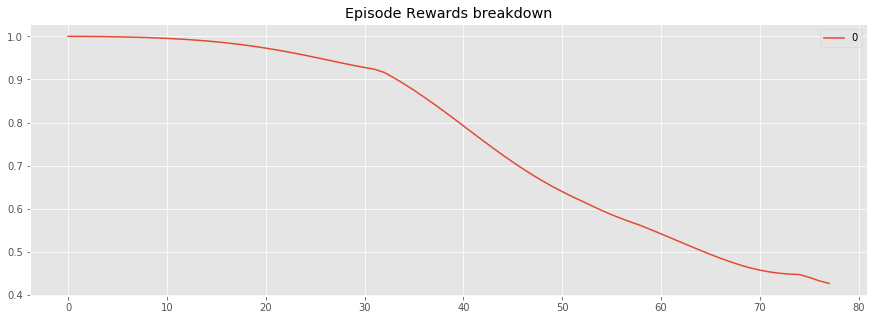

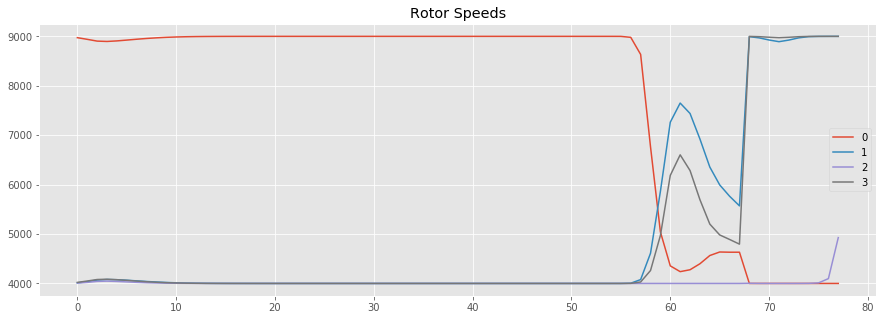

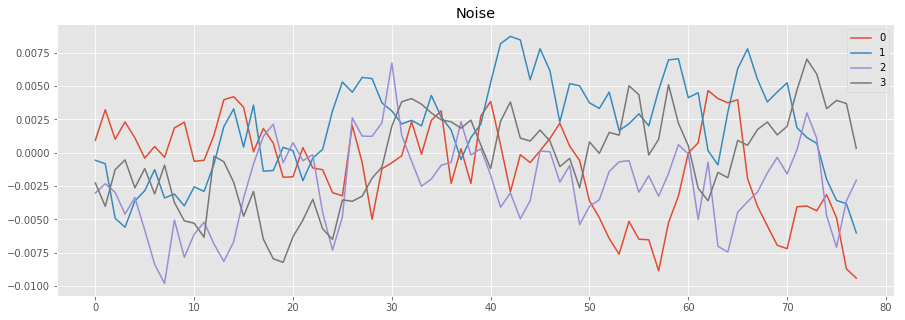

Episode =    2, score =   0.767 runtime =   1.560 Noise =   0.002, (best =   0.767)
R0 59.838  

Best Session Score:  0.767149624013702 Time:  2.754440036


In [18]:
##### Binary counter
import itertools
import datetime
import csv

count = 1

while True:   
    count += 1
    r_weight = [5.,5.,5.] # tolerancex2 = 0.5
    tolerance = [5.,5.,5.] # 7
    
    v_agent.task.set_params(r_weight,tolerance, [0.,0.,8.,0.,0.,0.], [0., 0., 8.])

    print("Running: ", r_weight, tolerance, count)

    # Filling buffer with nice samples
    v_agent.task.randomize = False
    v_agent.freeze = False
    v_agent.noise.sigma = 0.002
    v_agent.guide = False
    v_agent.tau = 0.002

    SAVE_GIF = 0
    SHOW_EPISODE = 0
    EPISODE_PLOT = 1
    DEBUG = -1
    SAVE_MODEL = 0
    num_episodes = 1
    tm = time.process_time()

    train(v_agent.task,v_agent)
    elapsed_time = time.process_time() - tm

    if(DEBUG == 0):
        # Score, CriticLR, ActorLR, Tau, Sigma, Network, (Count)
        with open("trials.csv","a") as csvFile:   
            writer = csv.writer(csvFile)
            csvData = [[str(datetime.datetime.now())]]
            writer.writerows(csvData)
            csvData = [[str(m.best_score), str(v_agent.critic_lr),str(v_agent.actor_lr), str(v_agent.tau),
                        str(v_agent.exploration_sigma), str(v_agent.network), str(m.count)]]
            writer.writerows(csvData)
            csvData = [[]]
            writer.writerows(csvData)
        csvFile.close()

    # m.best_episode.show_episode(False)
    # m.best_episode.save_gif(count)
    print("Best Session Score: ", m.best_score, "Time: ", elapsed_time)
    #v_agent.NN_learn(50)
    #if(count == 5):
    break

In [ ]:
v_agent.NN_learn(50)

In [ ]:
best_ = np.array(best_episodes)
#print("Epsiode", best_)

#for i in best_:
#    print("i:", i[1])
#    i[0].qd.clear_data()
#    i[0].save_gif(i[1])
#(best_[-1][0]).save_gif(best_[-1][1])
(best_[-1][0]).show_episode(True)
#print(best_[-1][1])

In [ ]:
# Show best episodes for every session
for ep in best_episodes:
    show_episode(ep[0])

In [ ]:
# Show best episode of current session
m.best_episode.show_episode(True)
print("Best Episode: ", m.best_episode_num, "Score: ", m.best_score)

# Load Saved Gifs
if(0):
    with open('1.gif','rb') as f:
        display(Image(data=f.read(), format='png'))

In [ ]:
## Load trained model
# Saving Model architecture generates error TypeError: cannot create 'sys.version_info' instances"
# Could only save Model Weights 
from agents.agent import DDPG

runtime = 10.                                     # time limit of the episode
factor = [1,1,1,1]

taskh = M_Task(init_pose, init_velocities, init_angle_velocities, runtime, target_pos, factor)
taskh.set_params(r_weight,tolerance, [0,0,2,0,0,0], [0,0,5])

trained_agent = DDPG(taskh, False) # Run mode

trained_agent.load_weights(1)

In [ ]:
state = trained_agent.reset_episode() # start a new episode
trained_agent.task.randomize = True
vs = Visual(trained_agent.task.sim.pose)


while True:
    action = trained_agent.predict(state) 
    next_state, reward, done = trained_agent.task.step(action)
    
   # print(taskh.sim.pose[:3])

    vs.add(trained_agent.task.sim.pose)
    # plot = real_time(0,vs,htask.sim.pose) # Real time (Display method)
    # plt.show()          

    state = next_state
    if done:
        
        vs.show_episode()
        #vs.save_gif("Final")
        print("Runtime: ", trained_agent.task.sim.time, trained_agent.task.sim.pose[:3])

        # Need this because QuadCopter class opens a plot   
        plt.close()
        break

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [ ]:
plot_stat(m)

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:
- I tried DDPG with different layer configurations, after much trial and error, I ended up using a version similar to the implementation in the DDPG paper. I found that DDPG is pretty resilient to the NN, but highly sensitive to the other hyperparameters. 
- After many trial and error, the best performing hyper parameters are:
 Actor: 0.0001 Critic: 0.0001 Regularization: 1e-09 gamma = 0.99 tau = 0.002 exploration_sigma = 0.1 
 

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
- I found the Hover Task to be very challenging. I challenge to pursue this task to successful completion
- This project was definitely a gradual learning curve. I learned so much about Quadcopter physics, Neural net architecures, different layers, regularizers, reward functions, DPPG in detail etc. I went through several reward functions before I finally developed a stable function with unit variance. 
- The final performance was not what I had hoped it would be. The Quadcopter would hover around the location for a few seconds, but fall soon after.  

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:
- Designing the reward function and tweaking the hyper parameters was the most difficult part of the project. I started saving and plotting everything I could to help crack the problem. I modified a Quadrotor library for this project and added some features for detailed analysis. There are so many variables to consider. The outcome of the training session wasn't necessarily a result of changing specific parameters, that's what made this project challenging.
- 